# Machine Learning in the Real World

##                1.Data preparation and cleaning

## Import Python Libraries

In [1]:
from functions import *
# Change flag to True value if you want to run all the taking-time functions
flag = False

## Defining Data Paths And Variables

## Obtaining the Data Set

In [2]:
if flag:
    DataPreparation.obtainDataFromLocalDBs()

## Graphical representation on globus map

### For viewing map graphics, you should install 2 libraries:

#### 1. Install Basemap:
        · To install this package with conda run, type:
          conda install -c conda-forge basemap=1.0.8.dev0
        · download package and install from: http://matplotlib.org/basemap/
#### 2. Install GeonamesCache:
        · To install this package with conda run, type:
          conda install -c mbonix geonamescache=0.20
          pip install geonamescache
        · download package and install from: https://pypi.python.org/pypi/geonamescache
          look for version 0.20

## Images comparison method

### For images map comparison, you should install opencv library
        · To install this package with conda run, type:
        · conda install -c https://conda.binstar.org/menpo opencv
        · download package and install from: http://matplotlib.org/basemap/

## Reading the Working Dataset

In [3]:
overall_data = pd.read_csv(DataPreparation.retriveMergedFilePath(),\
                           header=0, index_col=0, skiprows=0, encoding='iso-8859-1')
overall_data.head(5)

country    year  \
0  Afghanistan  2012.0   
1  Afghanistan  2016.0   
2      Albania  2006.0   
3      Albania  2009.0   
4      Albania  2012.0   

   Adjusted net enrolment rate, lower secondary, both sexes (%)  \
0                                                NaN              
1                                                NaN              
2                                                NaN              
3                                                NaN              
4                                                NaN              

   Adjusted net enrolment rate, lower secondary, female (%)  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                                NaN          
4                                                NaN          

   Adjusted net enrolment rate, lower secondary, gender parity index (GPI)  \
0                                                NaN                         
1                                                NaN                         
2                                                NaN                         
3                                                NaN                         
4                                                NaN                         

   Adjusted net enrolment rate, lower secondary, male (%)  \
0                                                NaN        
1                                                NaN        
2                                                NaN        
3                                                NaN        
4                                                NaN        

   Adjusted net enrolment rate, primary, both sexes (%)  \
0                                                NaN      
1                                                NaN      
2                                                NaN      
3                                          89.393333      
4                                          96.137093      

   Adjusted net enrolment rate, primary, female (%)  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                         88.698219   
4                                         95.353287   

   Adjusted net enrolment rate, primary, gender parity index (GPI)  \
0                                                NaN                 
1                                                NaN                 
2                                                NaN                 
3                                            0.98508                 
4                                            0.98445                 

   Adjusted net enrolment rate, primary, male (%)         ...          \
0                                             NaN         ...           
1                                             NaN         ...           
2                                             NaN         ...           
3                                       90.041763         ...           
4                                       96.859650         ...           

   Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total  \
0                                                NaN                                                                     
1                                                NaN                                                                     
2                                                NaN                                                                     
3                                                NaN                                                                     
4                                                NaN                        

## Nations tuples count- maybe we will remove some countries before running model

In [4]:
overall_data['country'].value_counts()[:10]

Netherlands       40
Spain             40
Mexico            40
France            40
Germany           40
Finland           40
Japan             40
Sweden            40
Italy             40
United Kingdom    40
Name: country, dtype: int64

## Years tuples histogram- maybe we will remove some years before running model

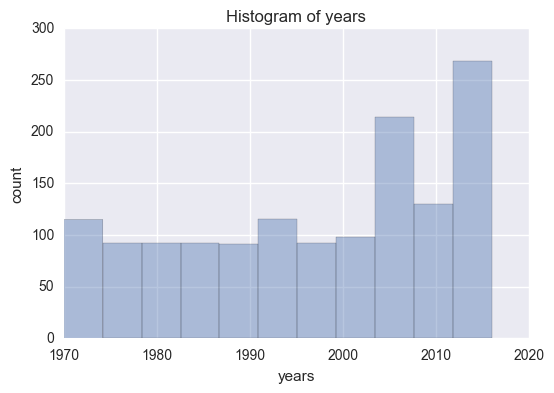

In [5]:
%matplotlib inline
sns.distplot(overall_data['year'], kde = False)
plt.title('Histogram of years')
plt.xlabel('years')
plt.ylabel('count')
plt.show()

### Histogram of Happy Planet Index values

C:\Users\Avi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


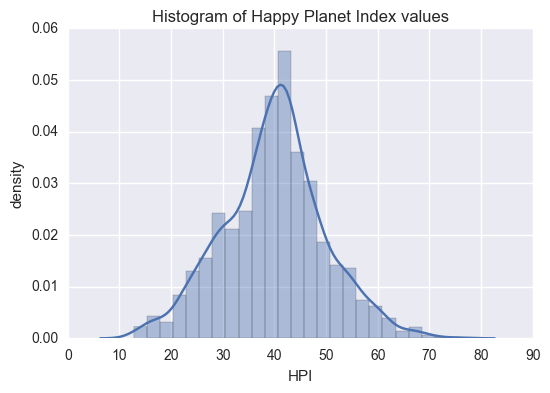

In [6]:
%matplotlib inline
sns.distplot(overall_data['Happy Planet Index'], bins = 25, kde = True)
plt.title('Histogram of Happy Planet Index values')
plt.xlabel('HPI')
plt.ylabel('density')
plt.show()

## Drop columns and rows with %(nulls)>90%

In [7]:
THRESH = 0.1
overall_data = overall_data.dropna(1, thresh=(overall_data.shape[0] * (1 - THRESH)))
overall_data = overall_data.dropna(0, thresh=(overall_data.shape[1] * (1 - THRESH)))
overall_data.head(5)

country    year  GNI (current US$)  \
0  Afghanistan  2012.0       2.157185e+10   
2      Albania  2006.0       9.254605e+09   
3      Albania  2009.0       1.185274e+10   
4      Albania  2012.0       1.222802e+10   
6      Algeria  2006.0       1.126050e+11   

   Mortality rate, under-5 (per 1,000)  \
0                                 99.5   
2                                 19.5   
3                                 17.3   
4                                 15.5   
6                                 32.1   

   Official entrance age to pre-primary education (years)  \
0                                                3.0        
2                                                3.0        
3                                                3.0        
4                                                3.0        
6                                                5.0        

   Official entrance age to primary education (years)  \
0                                                7.0    
2                                                6.0    
3                                                6.0    
4                                                6.0    
6                                                6.0    

   Population growth (annual %)  \
0                      3.135546   
2                     -0.630911   
3                     -0.673894   
4                     -0.156175   
6                      1.436793   

   Population of the official entrance age to primary education, both sexes (number)  \
0                                           941128.0                                   
2                                            51958.0                                   
3                                            42970.0                                   
4                                            34497.0                                   
6                                           586294.0                                   

   Population of the official entrance age to primary education, female (number)  \
0                                           458312.0                               
2                                            25031.0                               
3                                            20667.0                               
4                                            16461.0                               
6                                           287138.0                               

   Population of the official entrance age to primary education, male (number)  \
0                                           482816.0                             
2                                            26927.0                             
3                                            22303.0                             
4                                            18036.0                             
6                                           299156.0                             

          ...          Population, ages 15-64, total  Population, female  \
0         ...                             15220107.0          14436536.0   
2         ...                              1966814.0           1488492.0   
3         ...                              1969576.0           1451096.0   
4         ...                              1988708.0           1446391.0   
6         ...                             22439619.0          16709394.0   

   Population, female (% of total)  Population, male  \
0                        48.564038        15290267.0   
2                        49.739981         1504055.0   
3                        49.567423         1476423.0   
4                        49.871297         1453856.0   
6                        49.510301        17039934.0   

   Population, male (% of total)  Population, total  \
0                      51.435962         29726803.0   
2                      50.260019          2992547.0   
3                      50.432577          2927519.0   
4                    

## Find Most Corrolated features

In [8]:
HPI_correlation = overall_data[overall_data.columns[1:-1]].apply\
(lambda x: x.corr(overall_data['Happy Planet Index'], method='spearman'))
HPI_correlation = HPI_correlation.abs().sort_values(ascending=False)
HPI_correlation = pd.DataFrame({'Feature':HPI_correlation.index,\
                                'Correlation to Happy Planet Index':HPI_correlation.values})
HPI_correlation.head(6)

Correlation to Happy Planet Index                         Feature
0                           0.242673  Population, ages 15-64, female
1                           0.239526   Population, ages 15-64, total
2                           0.237877    Population, ages 15-64, male
3                           0.234088              Population, female
4                           0.232686               Population, total
5                           0.231833                Population, male

## Plot Corrolation matrix- taken 2 positive and 2 negative corrolated features

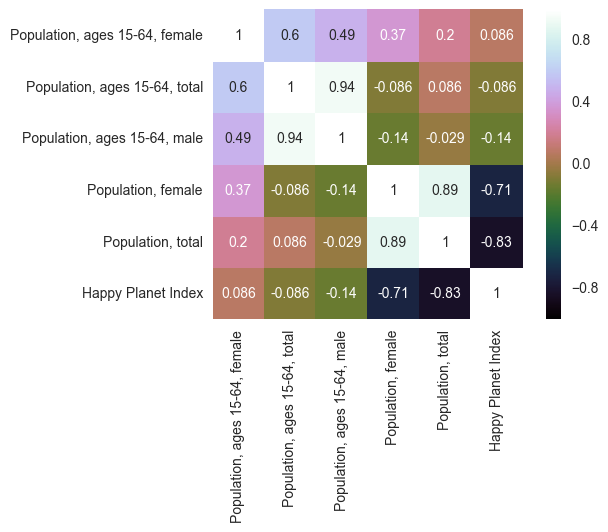

In [52]:
corr_features = HPI_correlation['Feature'].head(5).tolist() + ['Happy Planet Index']
corr_features = [x for x in corr_features if x != 'year']
overall_data_to_plot = overall_data[corr_features]
data_corr_mat= overall_data_to_plot.corr(method='spearman')
c = data_corr_mat.corr(method='spearman')
sns.heatmap(c, vmax=1, square=True, annot=True, cmap='cubehelix')

# Plotting Data on world map

In [53]:
# initialize list containing images' paths for concatination
countries_corrs = []

## Plotting the Happy Planet Index over the globe

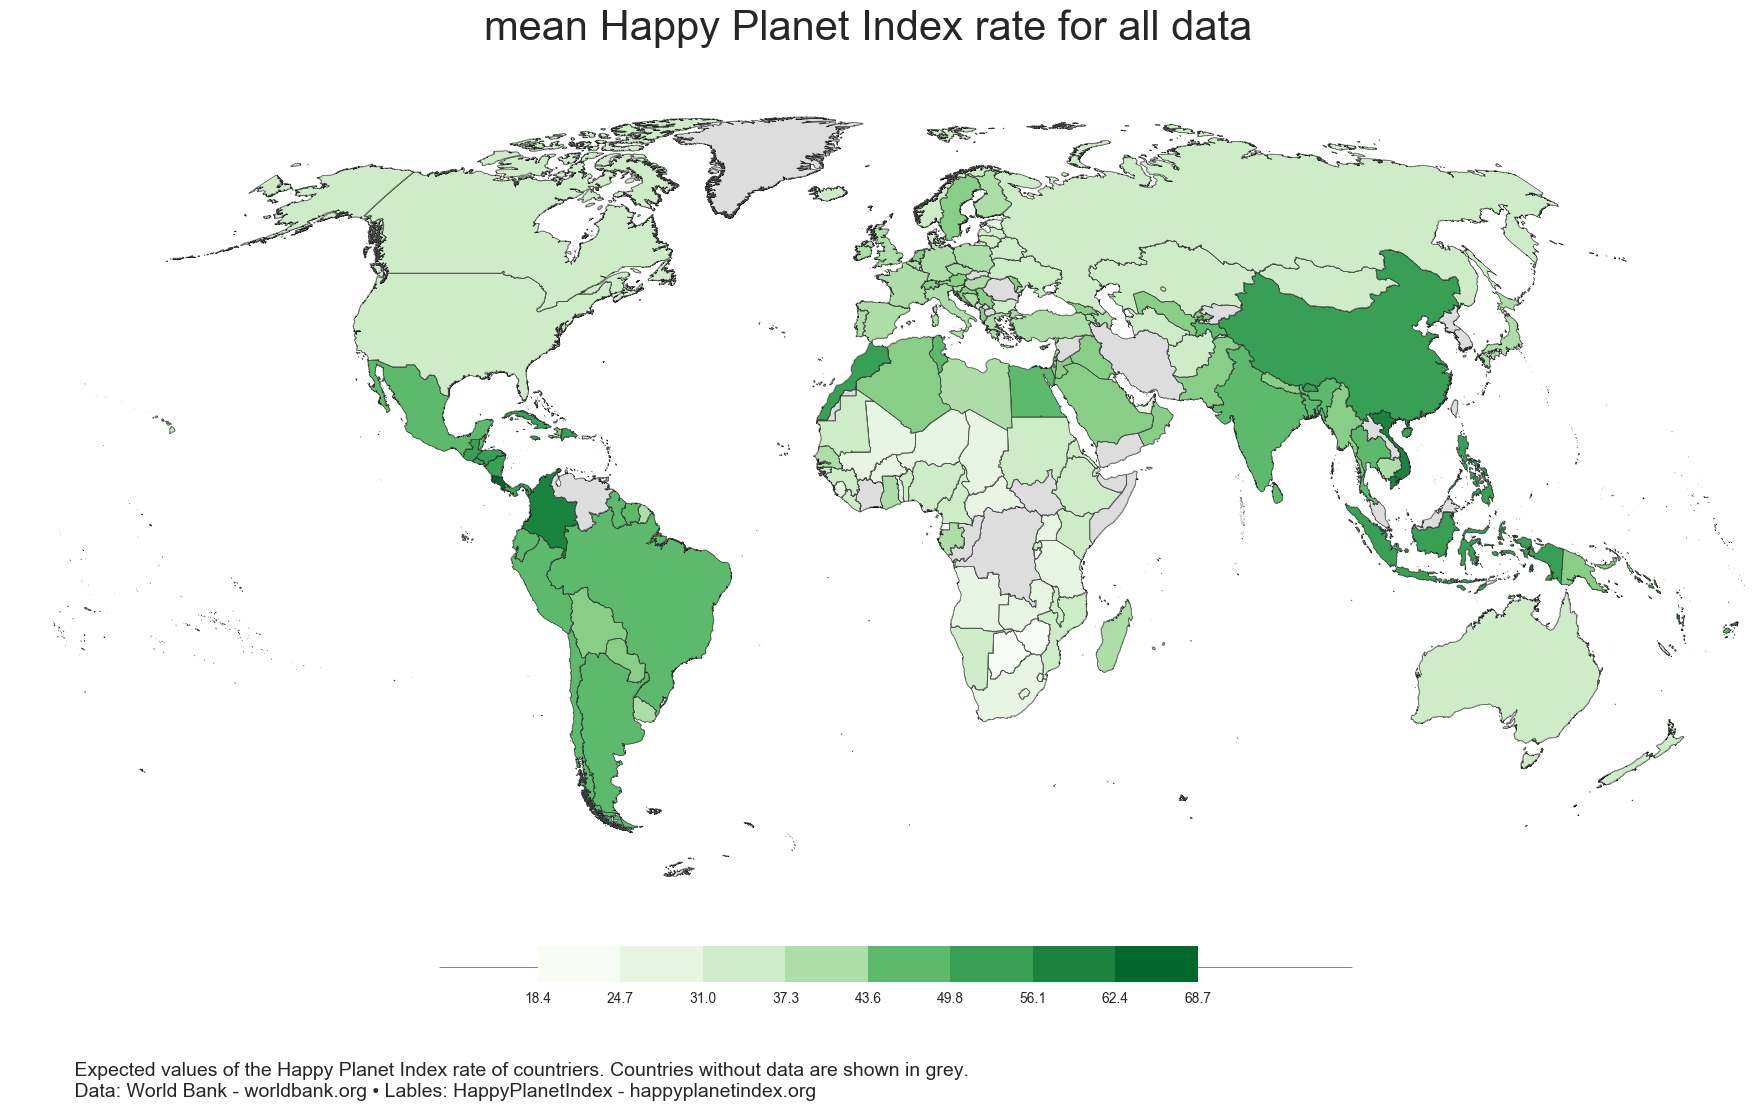

In [54]:
MapVisualizations.plotDataOnMap(overall_data, feature='Happy Planet Index', year='mean')

## Plotting the $1^{st}$ correlated feature over the globe

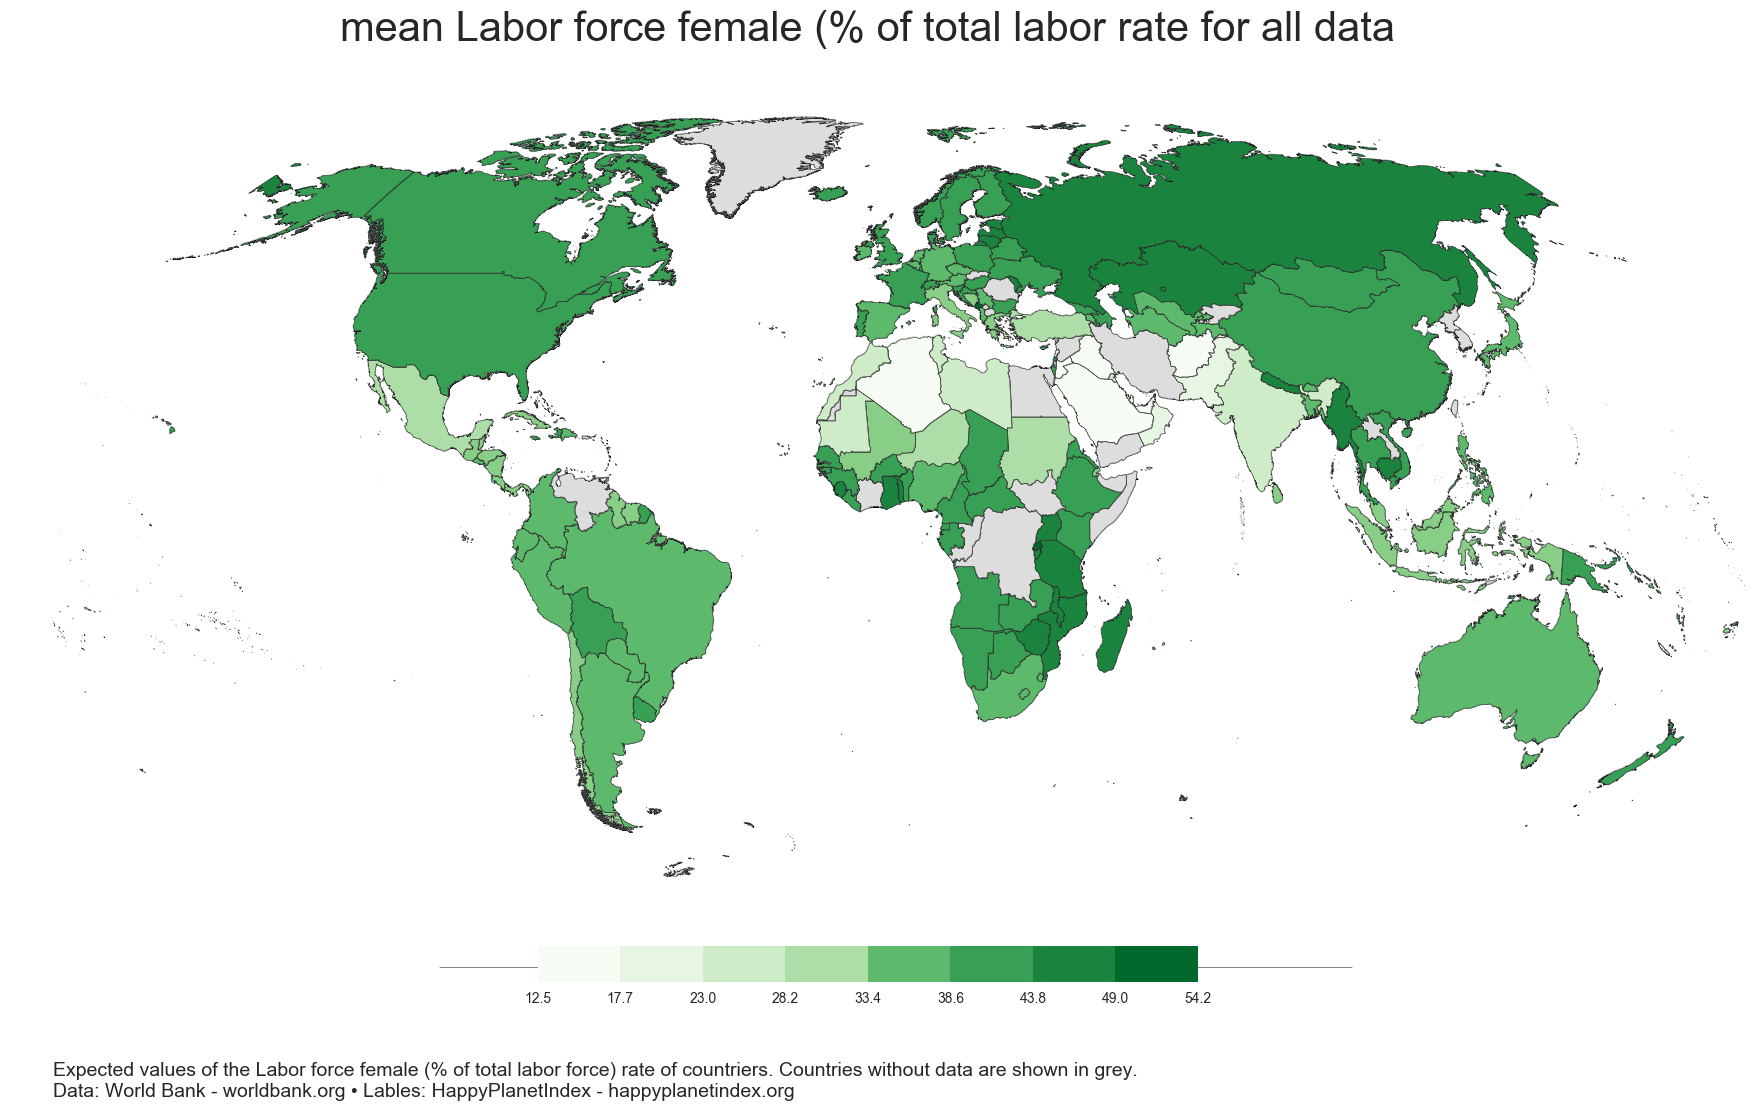

In [174]:
MapVisualizations.plotDataOnMap(overall_data, feature=corr_features[0], year='mean')

### Which Countries doesn't corrolate in the above feature and target

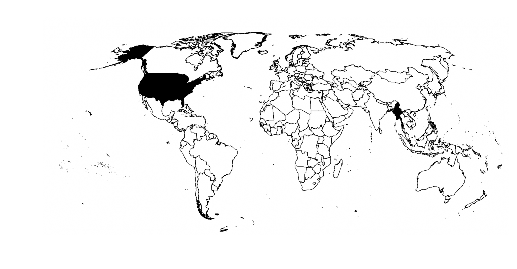

In [56]:
feature_image = globe_plots + 'Happy Planet Index_mean.png'
target_image = globe_plots + corr_features[0] +'_mean.png'
output_image = uncorrolated_plots + corr_features[0] + '.png'
countries_corrs.append(output_image)
MapVisualizations. plotUncorrolatedCountries(feature_image, target_image, output_image)

## Plotting the $2^{nd}$ correlated feature over the globe

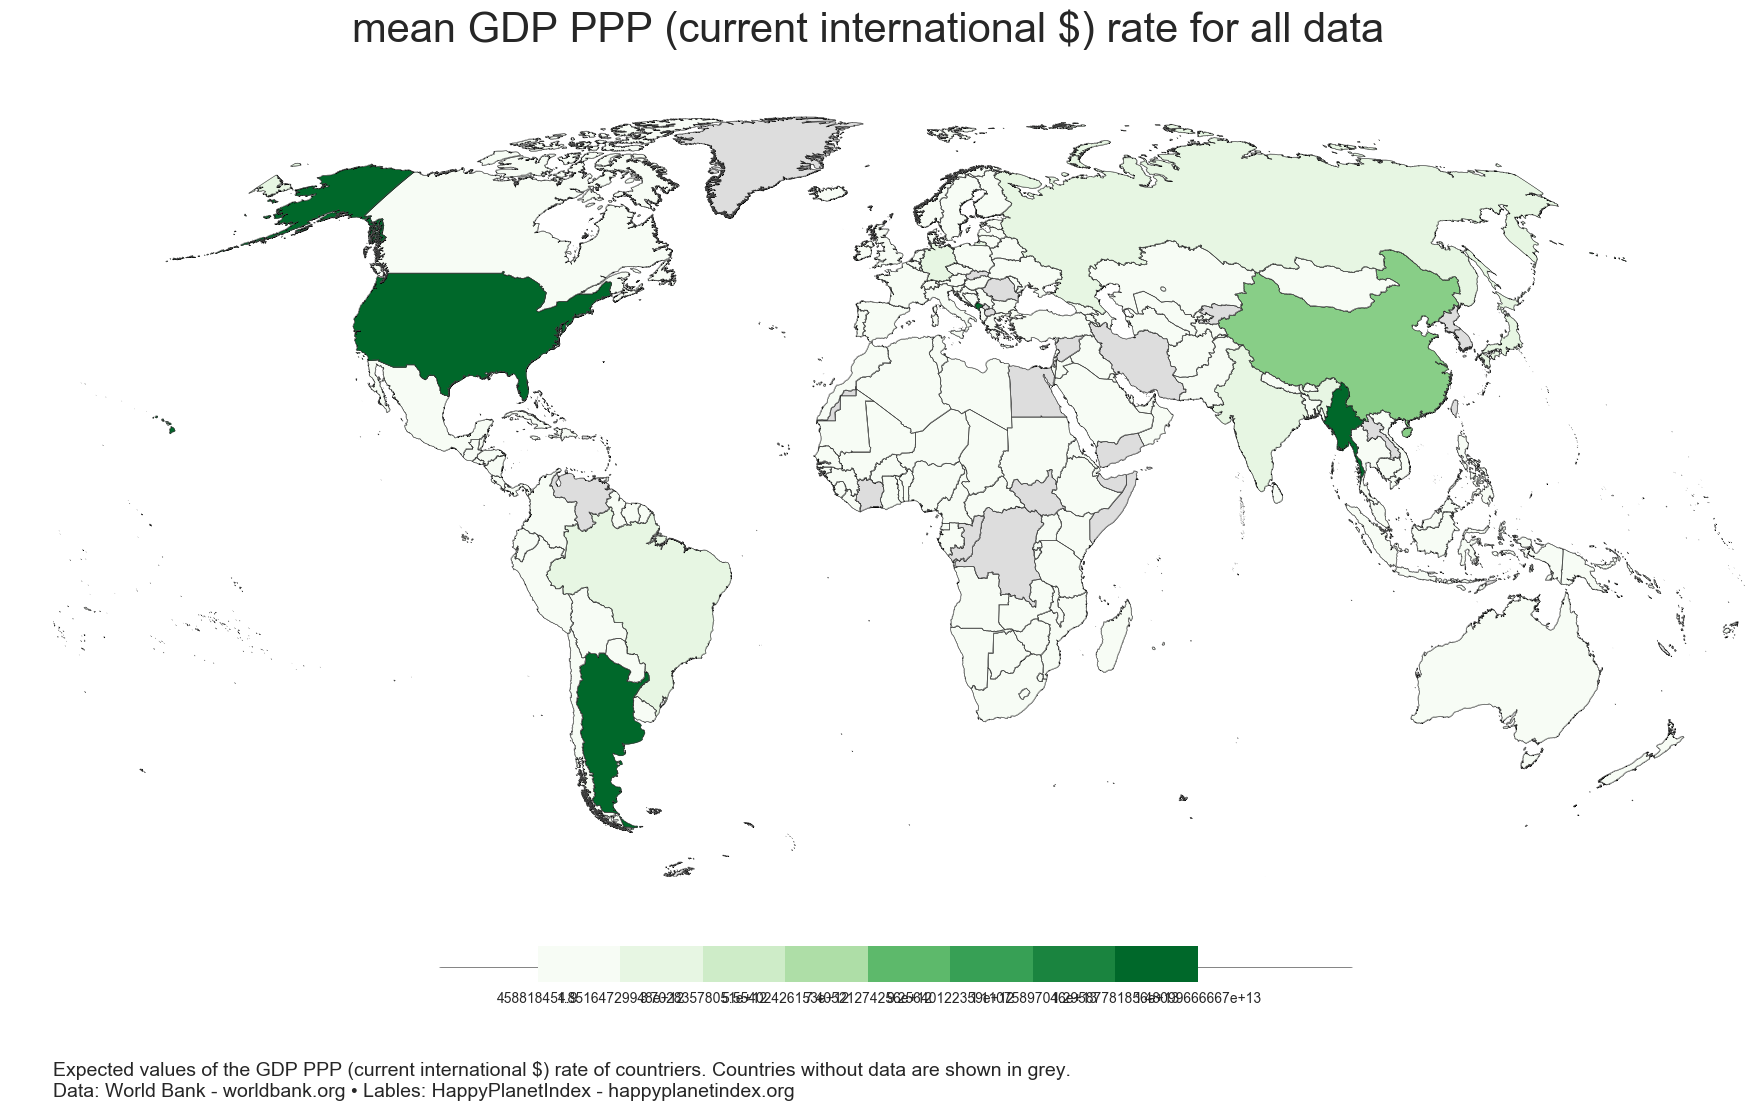

In [22]:
MapVisualizations.plotDataOnMap(overall_data, feature=corr_features[1], year='mean')

### Which Countries doesn't corrolate in the above feature and target

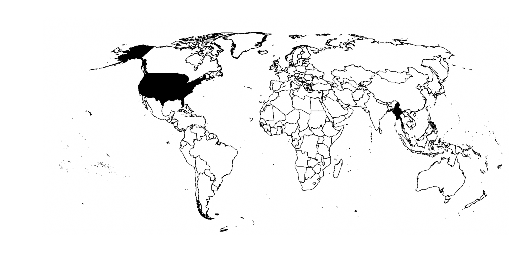

In [202]:
feature_image = globe_plots + 'Happy Planet Index_mean.png'
target_image = globe_plots + corr_features[1] +'_mean.png'
output_image = uncorrolated_plots + corr_features[1] +'.png'
countries_corrs.append(output_image)
MapVisualizations.plotUncorrolatedCountries(feature_image, target_image, output_image)

## Plotting the $3^{rd}$ correlated feature over the globe

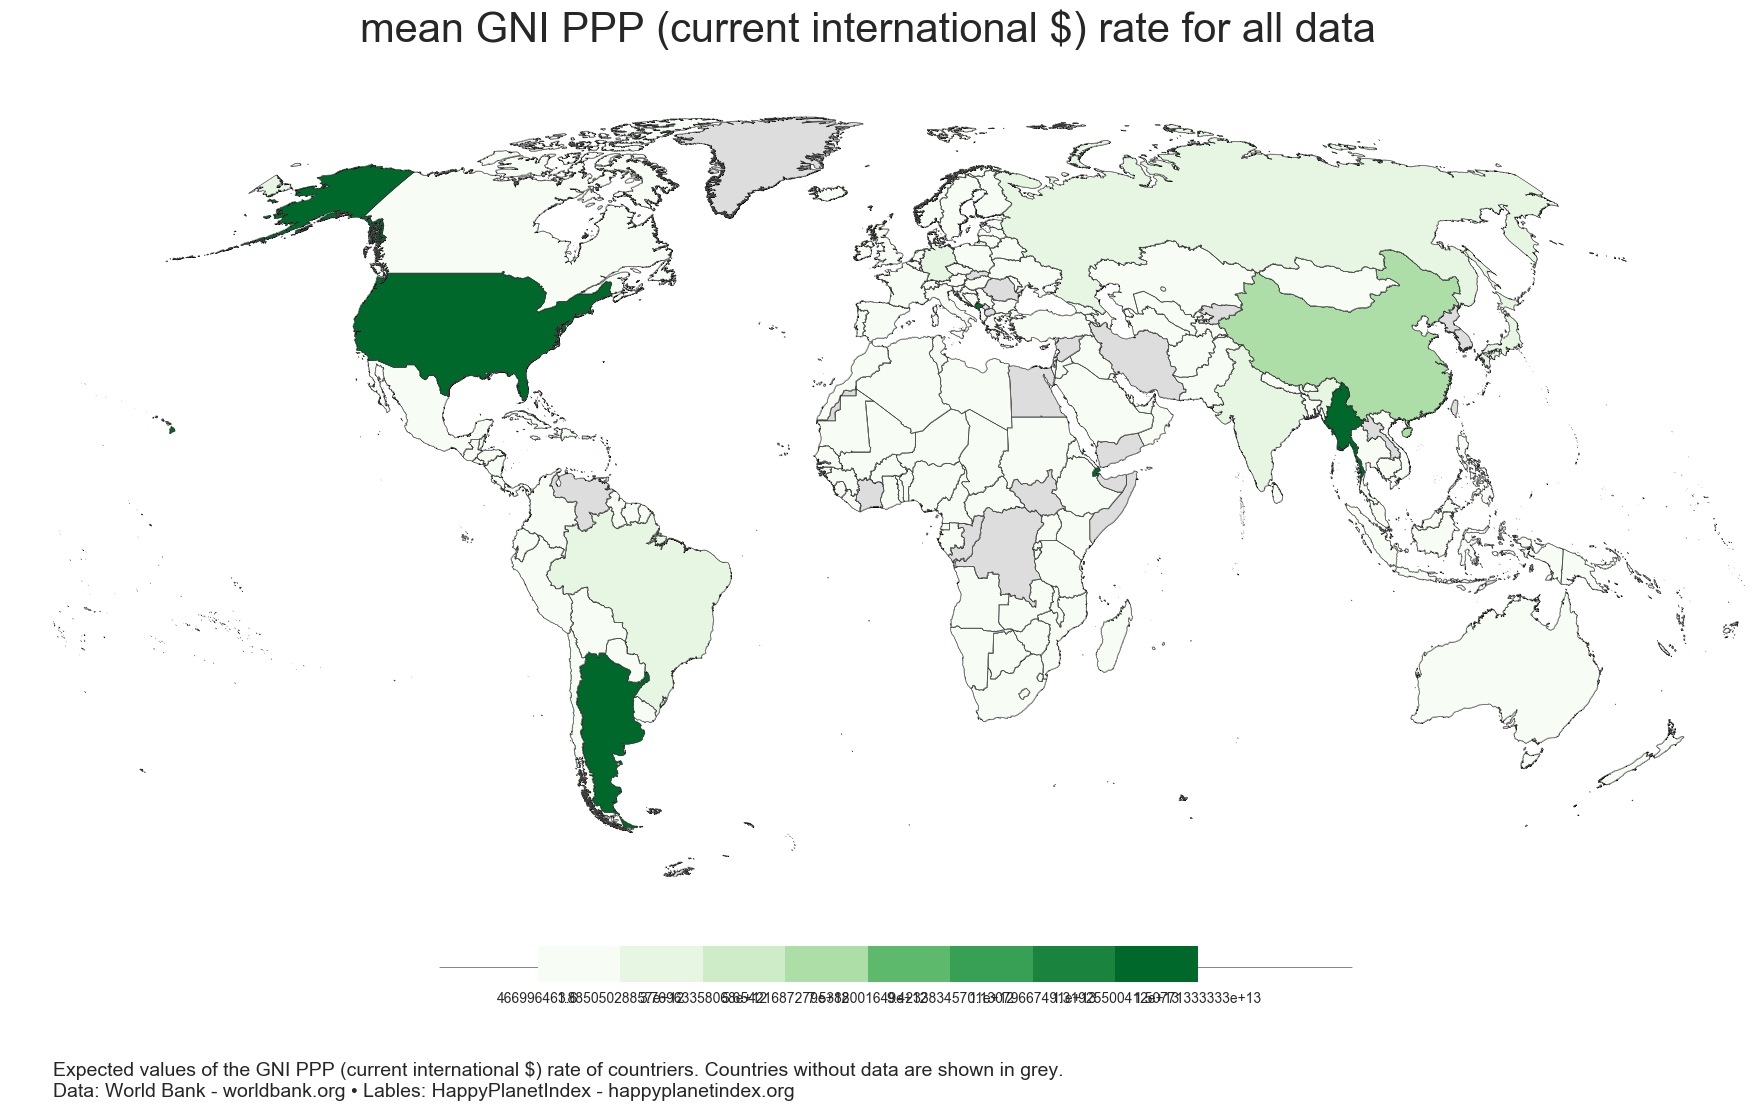

In [24]:
MapVisualizations.plotDataOnMap(overall_data, feature=corr_features[2], year='mean')

### Which Countries doesn't corrolate in the above feature and target

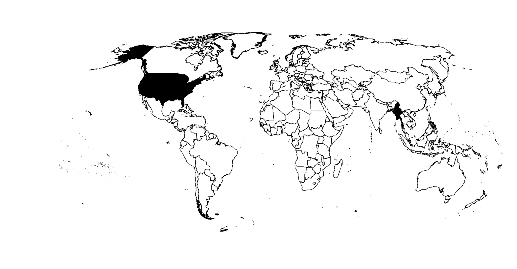

In [203]:
feature_image = globe_plots + 'Happy Planet Index_mean.png'
target_image = globe_plots + corr_features[2] + '_mean.png'
output_image = uncorrolated_plots + corr_features[2] + '.png'
countries_corrs.append(output_image)
MapVisualizations.plotUncorrolatedCountries(feature_image, target_image, output_image)

## Plotting the $4^{th}$ correlated feature over the globe

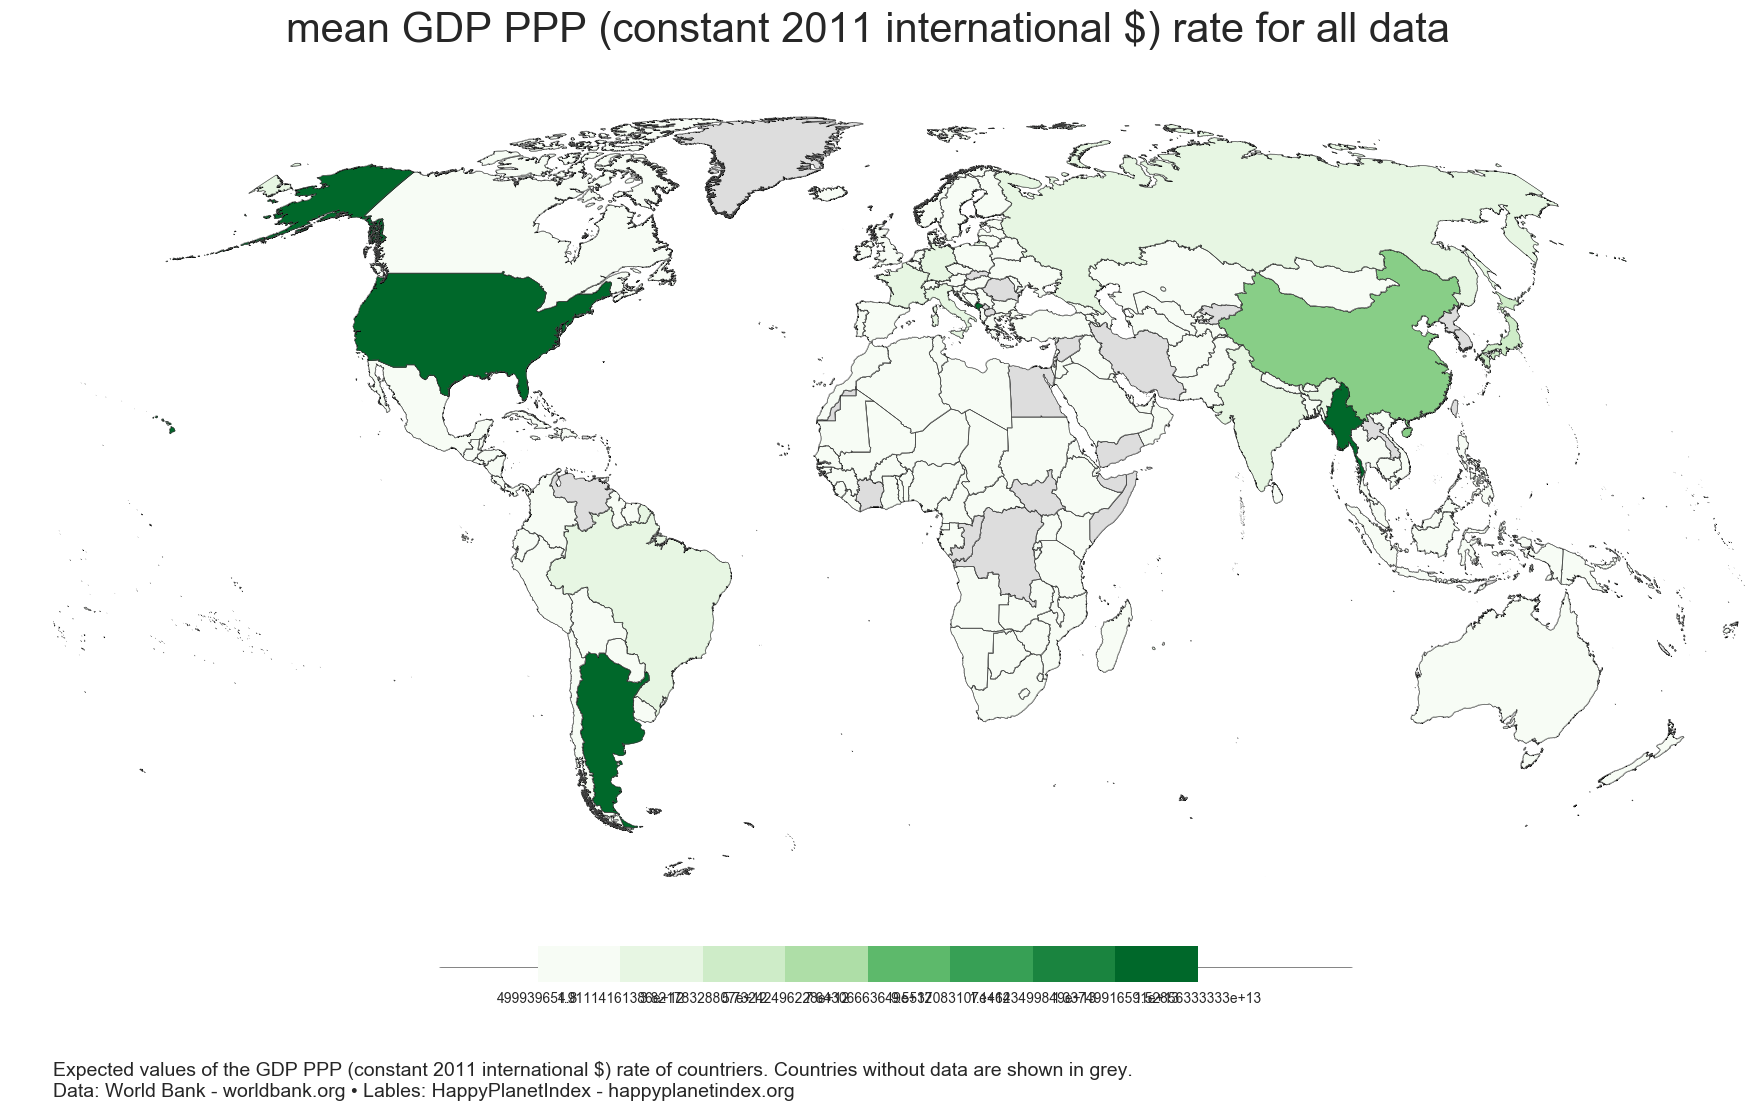

In [26]:
MapVisualizations.plotDataOnMap(overall_data, feature=corr_features[3], year='mean')

### Which Countries doesn't corrolate in the above feature and target

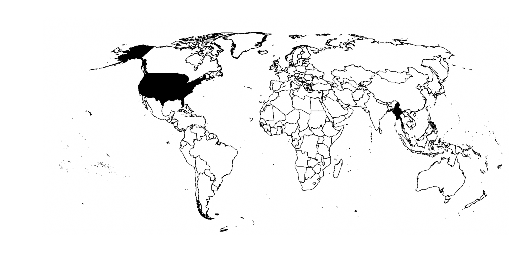

In [204]:
feature_image = globe_plots + 'Happy Planet Index_mean.png'
target_image = globe_plots + corr_features[3] + '_mean.png'
output_image = uncorrolated_plots + corr_features[3] + '.png'
countries_corrs.append(output_image)
MapVisualizations.plotUncorrolatedCountries(feature_image, target_image, output_image)

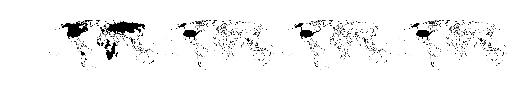

(<matplotlib.image.AxesImage at 0x1fa6dbfaba8>, None)

In [205]:
out = ImagesUtils.concat_n_images(countries_corrs)
plt.axis('off')
plt.imshow(out, cmap = 'gray', interpolation = 'bicubic'),plt.show()

### Impute nulls with medians

In [9]:
overall_data = overall_data.fillna(overall_data.median())
overall_data.head(5)

country    year  GNI (current US$)  \
0  Afghanistan  2012.0       2.157185e+10   
2      Albania  2006.0       9.254605e+09   
3      Albania  2009.0       1.185274e+10   
4      Albania  2012.0       1.222802e+10   
6      Algeria  2006.0       1.126050e+11   

   Mortality rate, under-5 (per 1,000)  \
0                                 99.5   
2                                 19.5   
3                                 17.3   
4                                 15.5   
6                                 32.1   

   Official entrance age to pre-primary education (years)  \
0                                                3.0        
2                                                3.0        
3                                                3.0        
4                                                3.0        
6                                                5.0        

   Official entrance age to primary education (years)  \
0                                                7.0    
2                                                6.0    
3                                                6.0    
4                                                6.0    
6                                                6.0    

   Population growth (annual %)  \
0                      3.135546   
2                     -0.630911   
3                     -0.673894   
4                     -0.156175   
6                      1.436793   

   Population of the official entrance age to primary education, both sexes (number)  \
0                                           941128.0                                   
2                                            51958.0                                   
3                                            42970.0                                   
4                                            34497.0                                   
6                                           586294.0                                   

   Population of the official entrance age to primary education, female (number)  \
0                                           458312.0                               
2                                            25031.0                               
3                                            20667.0                               
4                                            16461.0                               
6                                           287138.0                               

   Population of the official entrance age to primary education, male (number)  \
0                                           482816.0                             
2                                            26927.0                             
3                                            22303.0                             
4                                            18036.0                             
6                                           299156.0                             

          ...          Population, ages 15-64, total  Population, female  \
0         ...                             15220107.0          14436536.0   
2         ...                              1966814.0           1488492.0   
3         ...                              1969576.0           1451096.0   
4         ...                              1988708.0           1446391.0   
6         ...                             22439619.0          16709394.0   

   Population, female (% of total)  Population, male  \
0                        48.564038        15290267.0   
2                        49.739981         1504055.0   
3                        49.567423         1476423.0   
4                        49.871297         1453856.0   
6                        49.510301        17039934.0   

   Population, male (% of total)  Population, total  \
0                      51.435962         29726803.0   
2                      50.260019          2992547.0   
3                      50.432577          2927519.0   
4                    

## One Hot Encoding Foreach Country

In [10]:
overall_data_countries = overall_data['country']
oh_overall_data = overall_data.drop('country', axis=1)
onehot_overall_col = pd.get_dummies(overall_data['country'], prefix='country')

#check for missing cols in onehot_overall_col
for col in onehot_overall_col.columns:
    if col not in onehot_overall_col.columns:
        onehot_overall_col[col] = 0
        
oh_overall_data = pd.concat([oh_overall_data, onehot_overall_col], axis=1)
overall_data = oh_overall_data
overall_data['country'] = overall_data_countries
overall_data.head(5)

year  GNI (current US$)  Mortality rate, under-5 (per 1,000)  \
0  2012.0       2.157185e+10                                 99.5   
2  2006.0       9.254605e+09                                 19.5   
3  2009.0       1.185274e+10                                 17.3   
4  2012.0       1.222802e+10                                 15.5   
6  2006.0       1.126050e+11                                 32.1   

   Official entrance age to pre-primary education (years)  \
0                                                3.0        
2                                                3.0        
3                                                3.0        
4                                                3.0        
6                                                5.0        

   Official entrance age to primary education (years)  \
0                                                7.0    
2                                                6.0    
3                                                6.0    
4                                                6.0    
6                                                6.0    

   Population growth (annual %)  \
0                      3.135546   
2                     -0.630911   
3                     -0.673894   
4                     -0.156175   
6                      1.436793   

   Population of the official entrance age to primary education, both sexes (number)  \
0                                           941128.0                                   
2                                            51958.0                                   
3                                            42970.0                                   
4                                            34497.0                                   
6                                           586294.0                                   

   Population of the official entrance age to primary education, female (number)  \
0                                           458312.0                               
2                                            25031.0                               
3                                            20667.0                               
4                                            16461.0                               
6                                           287138.0                               

   Population of the official entrance age to primary education, male (number)  \
0                                           482816.0                             
2                                            26927.0                             
3                                            22303.0                             
4                                            18036.0                             
6                                           299156.0                             

   Population of the official entrance age to secondary general education, both sexes (number)  \
0                                           792507.0                                             
2                                            61868.0                                             
3                                            55894.0                                             
4                                            47735.0                                             
6                                           741383.0                                             

      ...       country_United Arab Emirates  country_United Kingdom  \
0     ...                                  0                       0   
2     ...                                  0                       0   
3     ...                                  0                       0   
4     ...                                  0                       0   
6     ...                                  0                       0   

   country_United States  country_Uruguay  country_Uzbekistan  \
0                      0                0              

## Split Data into training set and test set

In [11]:
train_data, test_data = train_test_split\
(overall_data, test_size = 0.2, random_state=0)
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)
train_data.head(5)

year  GNI (current US$)  Mortality rate, under-5 (per 1,000)  \
0  2006.0       2.665030e+11                                 73.1   
1  2000.0       1.282469e+10                                 21.0   
2  2009.0       2.588382e+10                                 77.4   
3  1980.0       2.193012e+10                                 14.3   
4  2003.0       1.628940e+11                                  5.6   

   Official entrance age to pre-primary education (years)  \
0                                                6.0        
1                                                3.0        
2                                                4.0        
3                                                4.0        
4                                                3.0        

   Official entrance age to primary education (years)  \
0                                                7.0    
1                                                7.0    
2                                                6.0    
3                                                6.0    
4                                                6.0    

   Population growth (annual %)  \
0                      1.369089   
1                     -0.493896   
2                      2.550882   
3                      1.150818   
4                      0.375411   

   Population of the official entrance age to primary education, both sexes (number)  \
0                                          1070902.0                                   
1                                            86832.0                                   
2                                           611582.0                                   
3                                            72106.0                                   
4                                           105363.0                                   

   Population of the official entrance age to primary education, female (number)  \
0                                           487407.0                               
1                                            42336.0                               
2                                           299877.0                               
3                                            35144.0                               
4                                            51442.0                               

   Population of the official entrance age to primary education, male (number)  \
0                                           583495.0                             
1                                            44496.0                             
2                                           311705.0                             
3                                            36962.0                             
4                                            53921.0                             

   Population of the official entrance age to secondary general education, both sexes (number)  \
0                                          1037694.0                                             
1                                           105197.0                                             
2                                           543238.0                                             
3                                            62981.0                                             
4                                           111392.0                                             

       ...       country_United Arab Emirates  country_United Kingdom  \
0      ...                                  0                       0   
1      ...                                  0                       0   
2      ...                                  0                       0   
3      ...                                  0                       0   
4      ...                                  0                       0   

   country_United States  country_Uruguay  country_Uzbekistan  \
0                      0                0        

### Partition factors, class and countries

In [12]:
train_countries = train_data['country']
train_class = train_data['Happy Planet Index']
train_factors = (train_data.drop(['Happy Planet Index', 'country'], axis=1))

test_countries = test_data['country']
test_class = test_data['Happy Planet Index']
test_factors =(test_data.drop(['Happy Planet Index', 'country'], axis=1))
train_factors.head(5)

year  GNI (current US$)  Mortality rate, under-5 (per 1,000)  \
0  2006.0       2.665030e+11                                 73.1   
1  2000.0       1.282469e+10                                 21.0   
2  2009.0       2.588382e+10                                 77.4   
3  1980.0       2.193012e+10                                 14.3   
4  2003.0       1.628940e+11                                  5.6   

   Official entrance age to pre-primary education (years)  \
0                                                6.0        
1                                                3.0        
2                                                4.0        
3                                                4.0        
4                                                3.0        

   Official entrance age to primary education (years)  \
0                                                7.0    
1                                                7.0    
2                                                6.0    
3                                                6.0    
4                                                6.0    

   Population growth (annual %)  \
0                      1.369089   
1                     -0.493896   
2                      2.550882   
3                      1.150818   
4                      0.375411   

   Population of the official entrance age to primary education, both sexes (number)  \
0                                          1070902.0                                   
1                                            86832.0                                   
2                                           611582.0                                   
3                                            72106.0                                   
4                                           105363.0                                   

   Population of the official entrance age to primary education, female (number)  \
0                                           487407.0                               
1                                            42336.0                               
2                                           299877.0                               
3                                            35144.0                               
4                                            51442.0                               

   Population of the official entrance age to primary education, male (number)  \
0                                           583495.0                             
1                                            44496.0                             
2                                           311705.0                             
3                                            36962.0                             
4                                            53921.0                             

   Population of the official entrance age to secondary general education, both sexes (number)  \
0                                          1037694.0                                             
1                                           105197.0                                             
2                                           543238.0                                             
3                                            62981.0                                             
4                                           111392.0                                             

         ...         country_Ukraine  country_United Arab Emirates  \
0        ...                       0                             0   
1        ...                       0                             0   
2        ...                       0                             0   
3        ...                       0                             0   
4        ...                       0                             0   

   country_United Kingdom  country_United States  country_Uruguay  \
0                       0                      0               

### Change all numeric values' datatypes to float

In [14]:
train_factors = train_factors.astype(np.float)
test_factors = test_factors.astype(np.float)
train_factors.dtypes[:5]

year                                                      float64
GNI (current US$)                                         float64
Mortality rate, under-5 (per 1,000)                       float64
Official entrance age to pre-primary education (years)    float64
Official entrance age to primary education (years)        float64
dtype: object

## Binning The Years by Decades

In [15]:
#binning the years train
min_year = min(min(train_factors['year']), min(test_factors['year']))

def decade(year):
    return(math.floor((year-min_year) / 10))

for row in range(train_factors.shape[0]):
    val=train_factors.at[row, 'year']
    new_val=decade(val)
    train_factors.set_value(row, 'year', new_val)
    
#binning the years test

for row in range(test_factors.shape[0]):
    val=test_factors.at[row, 'year']
    new_val=decade(val)
    test_factors.set_value(row, 'year', new_val)
train_factors.head(5)

year  GNI (current US$)  Mortality rate, under-5 (per 1,000)  \
0   3.0       2.665030e+11                                 73.1   
1   3.0       1.282469e+10                                 21.0   
2   3.0       2.588382e+10                                 77.4   
3   1.0       2.193012e+10                                 14.3   
4   3.0       1.628940e+11                                  5.6   

   Official entrance age to pre-primary education (years)  \
0                                                6.0        
1                                                3.0        
2                                                4.0        
3                                                4.0        
4                                                3.0        

   Official entrance age to primary education (years)  \
0                                                7.0    
1                                                7.0    
2                                                6.0    
3                                                6.0    
4                                                6.0    

   Population growth (annual %)  \
0                      1.369089   
1                     -0.493896   
2                      2.550882   
3                      1.150818   
4                      0.375411   

   Population of the official entrance age to primary education, both sexes (number)  \
0                                          1070902.0                                   
1                                            86832.0                                   
2                                           611582.0                                   
3                                            72106.0                                   
4                                           105363.0                                   

   Population of the official entrance age to primary education, female (number)  \
0                                           487407.0                               
1                                            42336.0                               
2                                           299877.0                               
3                                            35144.0                               
4                                            51442.0                               

   Population of the official entrance age to primary education, male (number)  \
0                                           583495.0                             
1                                            44496.0                             
2                                           311705.0                             
3                                            36962.0                             
4                                            53921.0                             

   Population of the official entrance age to secondary general education, both sexes (number)  \
0                                          1037694.0                                             
1                                           105197.0                                             
2                                           543238.0                                             
3                                            62981.0                                             
4                                           111392.0                                             

         ...         country_Ukraine  country_United Arab Emirates  \
0        ...                     0.0                           0.0   
1        ...                     0.0                           0.0   
2        ...                     0.0                           0.0   
3        ...                     0.0                           0.0   
4        ...                     0.0                           0.0   

   country_United Kingdom  country_United States  country_Uruguay  \
0                     0.0                    0.0              0.0   
1   

## Centering and Scaling nomeric features, and removing features with: $STD\approx0$ 

In [16]:
train_factors = pd.DataFrame(sp.StandardScaler().fit_transform(train_factors),columns = train_factors.columns)
test_factors = pd.DataFrame(sp.StandardScaler().fit_transform(test_factors),columns = test_factors.columns)
train_factors.head(5)

year  GNI (current US$)  Mortality rate, under-5 (per 1,000)  \
0  0.776976          -0.141060                             1.639145   
1  0.776976          -0.364860                            -0.078682   
2  0.776976          -0.353339                             1.780923   
3 -0.755605          -0.356827                            -0.299593   
4  0.776976          -0.232466                            -0.586447   

   Official entrance age to pre-primary education (years)  \
0                                           3.183326        
1                                          -0.656553        
2                                           0.623407        
3                                           0.623407        
4                                          -0.656553        

   Official entrance age to primary education (years)  \
0                                           1.500416    
1                                           1.500416    
2                                          -0.259418    
3                                          -0.259418    
4                                          -0.259418    

   Population growth (annual %)  \
0                      0.329195   
1                     -1.188304   
2                      1.291827   
3                      0.151402   
4                     -0.480207   

   Population of the official entrance age to primary education, both sexes (number)  \
0                                           0.210446                                   
1                                          -0.271571                                   
2                                          -0.014538                                   
3                                          -0.278784                                   
4                                          -0.262494                                   

   Population of the official entrance age to primary education, female (number)  \
0                                           0.182617                               
1                                          -0.276861                               
2                                          -0.010983                               
3                                          -0.284285                               
4                                          -0.267460                               

   Population of the official entrance age to primary education, male (number)  \
0                                           0.235520                             
1                                          -0.266739                             
2                                          -0.017744                             
3                                          -0.273760                             
4                                          -0.257957                             

   Population of the official entrance age to secondary general education, both sexes (number)  \
0                                           0.180273                                             
1                                          -0.253961                                             
2                                          -0.049979                                             
3                                          -0.273620                                             
4                                          -0.251076                                             

         ...         country_Ukraine  country_United Arab Emirates  \
0        ...               -0.044677                     -0.054745   
1        ...               -0.044677                     -0.054745   
2        ...               -0.044677                     -0.054745   
3        ...               -0.044677                     -0.054745   
4        ...               -0.044677                     -0.054745   

   country_United Kingdom  country_United States  country_Uruguay  \
0               -0.181444              -0.054745     

## Apply PCA for data visualizaion

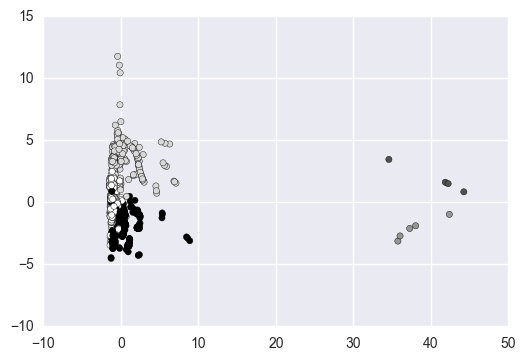

In [17]:
plot_columns, labels = DataVisualizations.twoDimPCAandClustering(train_factors)

## Print outliers

In [20]:
outliers_indecies = np.where(plot_columns[:,0]>30)[0].tolist()
outliers_df = train_data.loc[outliers_indecies, :]
outliers_df.head(min(5, len(outliers_indecies)))

year  GNI (current US$)  Mortality rate, under-5 (per 1,000)  \
19   1990.0       3.224040e+11                                125.8   
39   2005.0       8.283160e+11                                 74.6   
416  2012.0       8.441810e+12                                 13.4   
581  2009.0       5.050890e+12                                 17.0   
583  2000.0       1.190590e+12                                 36.9   

     Official entrance age to pre-primary education (years)  \
19                                                 4.0        
39                                                 3.0        
416                                                3.0        
581                                                3.0        
583                                                3.0        

     Official entrance age to primary education (years)  \
19                                                 6.0    
39                                                 6.0    
416                                                6.0    
581                                                6.0    
583                                                7.0    

     Population growth (annual %)  \
19                       2.073448   
39                       1.577221   
416                      0.487231   
581                      0.497381   
583                      0.787957   

     Population of the official entrance age to primary education, both sexes (number)  \
19                                          22332824.0                                   
39                                          25124492.0                                   
416                                         15345553.0                                   
581                                         14666162.0                                   
583                                         23358188.0                                   

     Population of the official entrance age to primary education, female (number)  \
19                                          10765491.0                               
39                                          11906432.0                               
416                                          7099347.0                               
581                                          6814742.0                               
583                                         11089611.0                               

     Population of the official entrance age to primary education, male (number)  \
19                                          11567334.0                             
39                                          13218059.0                             
416                                          8246206.0                             
581                                          7851420.0                             
583                                         12268577.0                             

     Population of the official entrance age to secondary general education, both sexes (number)  \
19                                          19544858.0                                             
39                                          24098452.0                                             
416                                         14974110.0                                             
581                                         17667652.0                                             
583                                         26354584.0                                             

      ...     country_United Arab Emirates  country_United Kingdom  \
19    ...                                0                       0   
39    ...                                0                       0   
416   ...                                0                       0   
581   ...                                0                       0   
583   ...                                0                       0   

     country_United States  country_Ur

### Remove outliers if reducing aquracy

In [24]:
training_data_with_outliers = train_factors.copy()
training_class_with_outliers = train_class.copy()

f = FloatProgress(min=0, max=100)
display(f)

enet = ElasticNetCV(max_iter=5000, cv=10, n_jobs=-1)
enet.fit(training_data_with_outliers, training_class_with_outliers)
train_r_squared_with_outliers = enet.score\
(training_data_with_outliers, training_class_with_outliers)
f.value += 45

training_data_without_outliers = train_factors.drop(outliers_indecies, inplace=False)
training_class_without_outliers = train_class.drop(outliers_indecies, inplace=False)

enet.fit(training_data_without_outliers, training_class_without_outliers)
train_r_squared_without_outliers = enet.score\
(training_data_without_outliers, training_class_without_outliers)

f.value += 45

print('R^2 on validation set with outliers:', train_r_squared_with_outliers,\
          ', and without outliers:', train_r_squared_without_outliers)
if (train_r_squared_without_outliers < train_r_squared_with_outliers):
    print('Removing outliers from training set.')
    train_factors = train_factors.drop(train_factors.index[outliers])
    train_class = train_class.drop(train_class.index[outliers])
    print('2D PCA after removal:')
    plot_columns, labels = DataVisualizations.twoDimPCAandClustering(train_factors)
else:
    print('Leaving outliers in the training set.')
f.value += 10

R^2 on validation set with outliers: 0.844617118968 , and without outliers: 0.850053159232
Leaving outliers in the training set.


## Feature selection with E.Net model

In [25]:
# run elastic model for feature selection 
enet = ElasticNetCV(max_iter=5000, cv=5, n_jobs=-1)
enet.fit(train_factors, train_class)

sfm = fs.SelectFromModel(enet, prefit=True)
chosen_features_and_coefs = [(train_factors.columns[i],enet.coef_[i]) for i in sfm.get_support(True)]

chosen_features_and_coefs.sort(key=lambda x:abs(x[1]), reverse=True)
headers = [['correlated feature', 'linear correlation rate to target']]
data = headers + [[x[0], x[1]]\
                  for x in chosen_features_and_coefs]
headers = data.pop(0) # gives the headers as list and leaves data
table = pd.DataFrame(data, columns=headers)
print("Enet Strong factors are: ")
table.head(10)

Enet Strong factors are: 


correlated feature  linear correlation rate to target
0   country_Luxembourg                          -2.118040
1       country_Mexico                           2.024978
2  country_Switzerland                           1.533116
3       country_Sweden                           1.434767
4   country_Costa Rica                           1.387462
5       country_Norway                          -1.315430
6                 year                           1.240573
7    country_Guatemala                           1.201697
8  country_Netherlands                           1.138996
9      country_Vietnam                           1.068120

## Compute statistics on training set for Enet prediction

In [26]:
train_r_squared = enet.score(train_factors, train_class)
train_predictions = enet.predict(train_factors)

# Compute the error.test_mse = mean_squared_error(y_test, rf.predict(test_factors))
train_rmse = np.sqrt(mean_squared_error(train_class, train_predictions))
print("train R^2, %.4f, train RMSE, %.4f" % (train_r_squared, train_rmse))

train R^2, 0.8426, train RMSE, 3.5551


## Countries corrolated to target plot

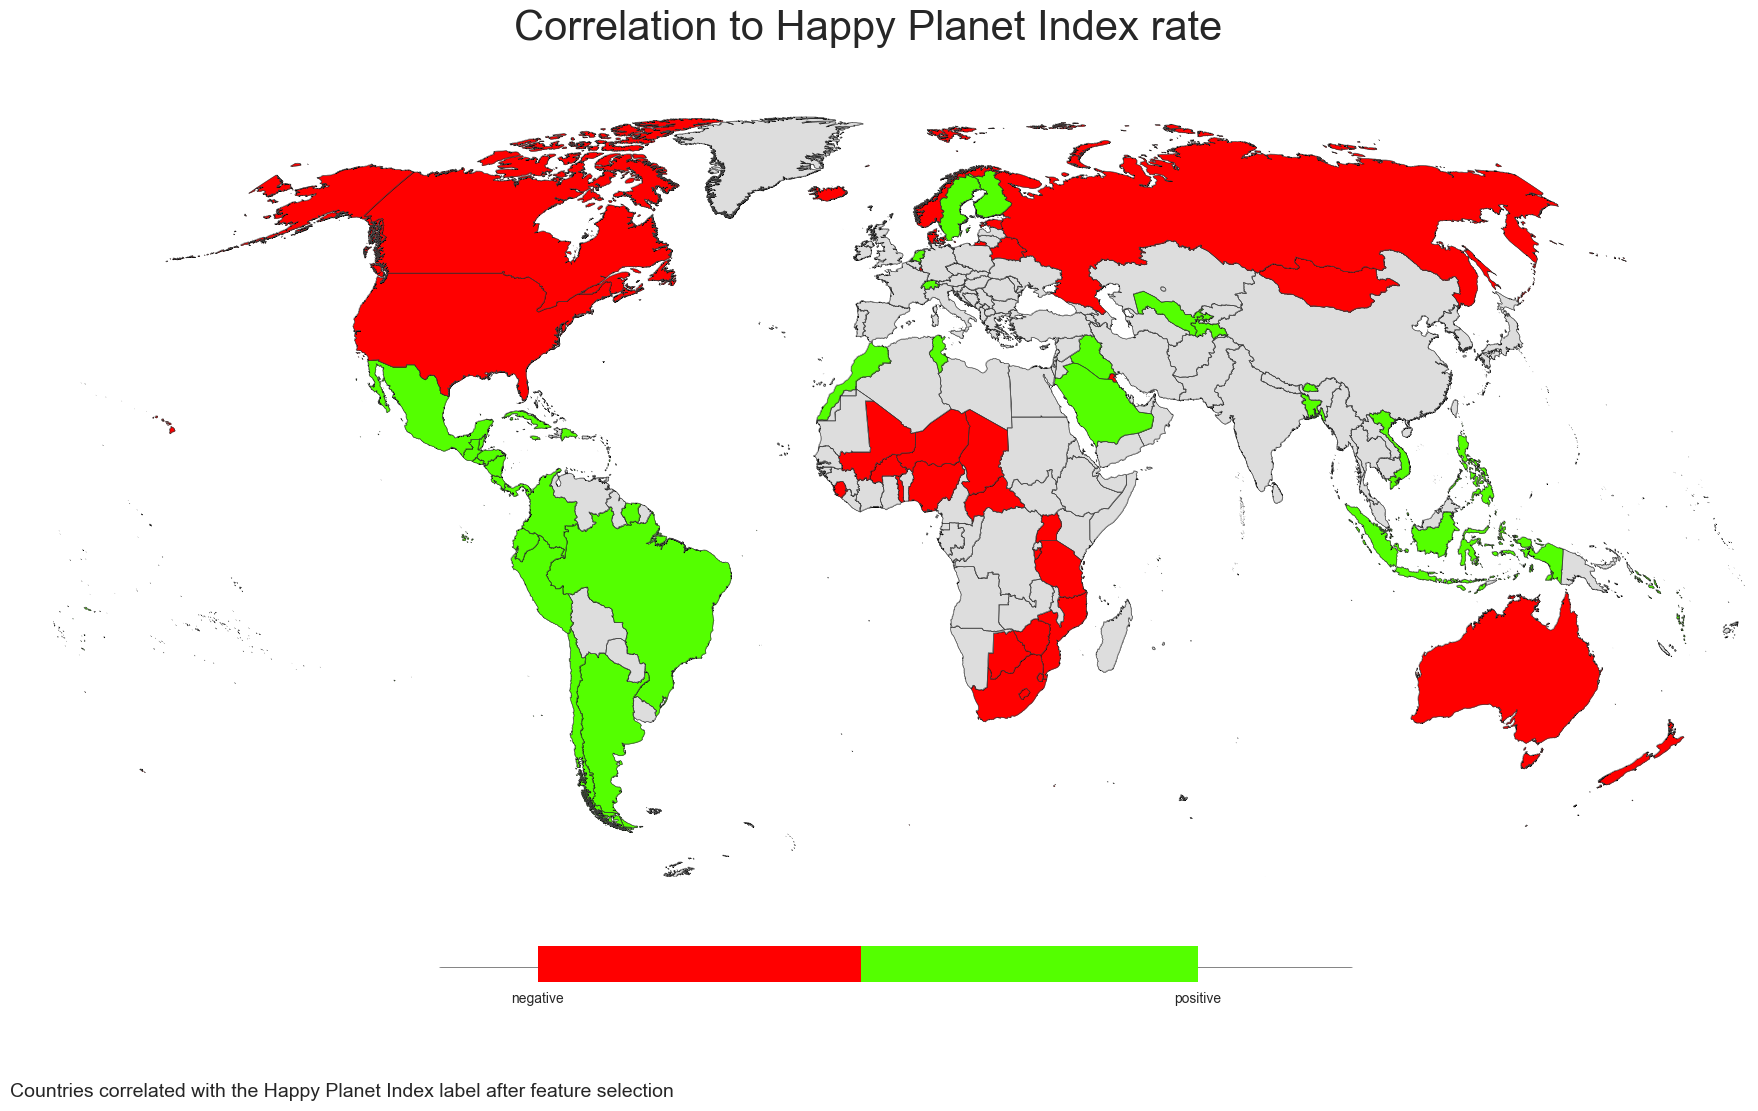

In [27]:
headers = [['country', 'Correlation to Happy Planet Index']]
data = headers + [[x[0].split('country_')[1], np.sign(x[1])]\
                  for x in chosen_features_and_coefs if x[0].startswith('country_')]
headers = data.pop(0) # gives the headers as list and leaves data
df = pd.DataFrame(data, columns=headers)
MapVisualizations.plotDataOnMap(df, year='mean', feature="Correlation to Happy Planet Index", binary=True,\
              descripton='Countries correlated with the Happy Planet Index label after feature selection')

### Take remaining features

In [28]:
chosen_features = [x[0] for x in chosen_features_and_coefs]
train_factors = train_factors[chosen_features]
test_factors = test_factors[chosen_features]
train_factors.head(5)

country_Luxembourg  country_Mexico  country_Switzerland  country_Sweden  \
0           -0.172463       -0.172463            -0.178494       -0.178494   
1           -0.172463       -0.172463            -0.178494       -0.178494   
2           -0.172463       -0.172463            -0.178494       -0.178494   
3           -0.172463       -0.172463            -0.178494       -0.178494   
4           -0.172463       -0.172463            -0.178494       -0.178494   

   country_Costa Rica  country_Norway      year  country_Guatemala  \
0           -0.054745       -0.172463  0.776976          -0.054745   
1           -0.054745       -0.172463  0.776976          -0.054745   
2           -0.054745       -0.172463  0.776976          -0.054745   
3           -0.054745       -0.172463 -0.755605          -0.054745   
4           -0.054745       -0.172463  0.776976          -0.054745   

   country_Netherlands  country_Vietnam      ...       country_Nigeria  \
0            -0.181444        -0.054745      ...             -0.054745   
1            -0.181444        -0.054745      ...             -0.054745   
2            -0.181444        -0.054745      ...             -0.054745   
3            -0.181444        -0.054745      ...             -0.054745   
4            -0.181444        -0.054745      ...             -0.054745   

   country_Tonga  country_Saudi Arabia  country_Mozambique  country_Suriname  \
0      -0.031575             -0.054745           -0.054745         -0.031575   
1      -0.031575             -0.054745           -0.054745         -0.031575   
2      -0.031575             -0.054745           -0.054745         -0.031575   
3      -0.031575             -0.054745           -0.054745         -0.031575   
4      -0.031575             -0.054745           -0.054745         -0.031575   

   country_Mali  country_Finland  \
0     -0.054745        -0.184352   
1     -0.054745        -0.184352   
2     -0.054745        -0.184352   
3     -0.054745        -0.184352   
4     -0.054745        -0.184352   

   Population of the official entrance age to secondary general education, female (number)  \
0                                           0.185176                                         
1                                          -0.258175                                         
2                                          -0.048331                                         
3                                          -0.278386                                         
4                                          -0.255242                                         

   country_Uzbekistan  country_Iraq  
0           -0.054745     -0.063246  
1           -0.054745     -0.063246  
2           -0.054745     -0.063246  
3           -0.054745     -0.063246  
4           -0.054745     -0.063246  

[5 rows x 75 columns]

### Apply PCA after feature selection

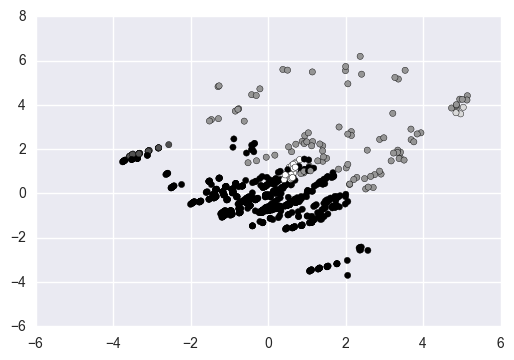

In [29]:
plot_columns, labels = DataVisualizations.twoDimPCAandClustering(train_factors)

## Features extraction

In [30]:
poly = sp.PolynomialFeatures(2, include_bias=False)
transf_train = poly.fit_transform(train_factors)
transf_test = poly.fit_transform(test_factors)
target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(train_factors.columns,p) for p in poly.powers_]]
train_factors_after_extracion = (pd.DataFrame(transf_train, columns = target_feature_names))
test_factors_after_extracion = (pd.DataFrame(transf_test, columns = target_feature_names))
train_factors_after_extracion.head(5)

country_Luxembourg^1  country_Mexico^1  country_Switzerland^1  \
0             -0.172463         -0.172463              -0.178494   
1             -0.172463         -0.172463              -0.178494   
2             -0.172463         -0.172463              -0.178494   
3             -0.172463         -0.172463              -0.178494   
4             -0.172463         -0.172463              -0.178494   

   country_Sweden^1  country_Costa Rica^1  country_Norway^1    year^1  \
0         -0.178494             -0.054745         -0.172463  0.776976   
1         -0.178494             -0.054745         -0.172463  0.776976   
2         -0.178494             -0.054745         -0.172463  0.776976   
3         -0.178494             -0.054745         -0.172463 -0.755605   
4         -0.178494             -0.054745         -0.172463  0.776976   

   country_Guatemala^1  country_Netherlands^1  country_Vietnam^1  \
0            -0.054745              -0.181444          -0.054745   
1            -0.054745              -0.181444          -0.054745   
2            -0.054745              -0.181444          -0.054745   
3            -0.054745              -0.181444          -0.054745   
4            -0.054745              -0.181444          -0.054745   

        ...        country_Finland^2  \
0       ...                 0.033986   
1       ...                 0.033986   
2       ...                 0.033986   
3       ...                 0.033986   
4       ...                 0.033986   

   country_Finland^1xPopulation of the official entrance age to secondary general education, female (number)^1  \
0                                          -0.034137                                                             
1                                           0.047595                                                             
2                                           0.008910                                                             
3                                           0.051321                                                             
4                                           0.047054                                                             

   country_Finland^1xcountry_Uzbekistan^1  country_Finland^1xcountry_Iraq^1  \
0                                0.010092                          0.011659   
1                                0.010092                          0.011659   
2                                0.010092                          0.011659   
3                                0.010092                          0.011659   
4                                0.010092                          0.011659   

   Population of the official entrance age to secondary general education, female (number)^2  \
0                                           0.034290                                           
1                                           0.066654                                           
2                                           0.002336                                           
3                                           0.077499                                           
4                                           0.065149                                           

   Population of the official entrance age to secondary general education, female (number)^1xcountry_Uzbekistan^1  \
0                                          -0.010137                                                                
1                                           0.014134                                                                
2                                           0.002646                                                                
3                                           0.015240                                                                
4                                           0.013973                                                                

   Population of the official entrance age to secondary general e

## Corrolations between target and extracted features

In [31]:
poly = sp.PolynomialFeatures(2, include_bias=False)
transf_train = poly.fit_transform(train_factors)
target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(train_factors.columns,p) for p in poly.powers_]]
train_factors_after_extracion = (pd.DataFrame(transf_train, columns = target_feature_names))

max_corr_before = HPI_correlation['Correlation to Happy Planet Index'].iloc[0]
HPI_correlation_feature_extraction = train_factors_after_extracion[train_factors_after_extracion.columns[:]].apply\
(lambda x: x.corr(train_data['Happy Planet Index'], method='spearman'))
HPI_correlation_feature_extraction = HPI_correlation_feature_extraction.abs().sort_values(ascending=False)
HPI_correlation_feature_extraction = pd.DataFrame({'Feature':HPI_correlation_feature_extraction.index,\
                                'Correlation to Happy Planet Index':HPI_correlation_feature_extraction.values})
HPI_correlation_feature_extraction = HPI_correlation_feature_extraction.loc\
[(HPI_correlation_feature_extraction["Correlation to Happy Planet Index"] > max_corr_before) \
 & ((HPI_correlation_feature_extraction["Feature"].str.count("\^") == 2) | ((HPI_correlation_feature_extraction["Feature"].str.count("\^2") == 1)))]
print('There are', HPI_correlation_feature_extraction.shape[0],\
      'new features that are more corrolative to target then old features and many other new very correlative features')
HPI_correlation_feature_extraction.head(5)

There are 59 new features that are more corrolative to target then old features and many other new very correlative features


Correlation to Happy Planet Index  \
0                           0.328028   
1                           0.325556   
2                           0.318305   
3                           0.311941   
4                           0.292567   

                                        Feature  
0        country_Luxembourg^1xcountry_Denmark^1  
1         country_Luxembourg^1xcountry_Norway^1  
2  year^1xMortality rate, under-5 (per 1,000)^1  
3      country_Luxembourg^1xcountry_Australia^1  
4    country_Luxembourg^1xcountry_New Zealand^1

# Kernel Ridge model

In [27]:
from sklearn.kernel_ridge import KernelRidge

#tuned_parameters = {'alpha': [1, 0.1, 0.15, 0.155, 0.1555], 'degree': [1, 2, 3, 4, 5], 'gamma': [1,0.1,0.01,0.001, 0.0001, None], 'kernel': ['polynomial']}
#model = KernelRidge(alpha=0.007, degree=2, kernel='polynomial',gamma=0.0022)
#model = KernelRidge(alpha=0.00007, degree=2, kernel='polynomial',gamma=0.000022)

param_grid = {'alpha': [1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12],\
              'gamma': [1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12],\
             'degree':[1,2,3]}

def frange(x, y, jump):
  while x < y:
    yield x
    x += jump

#alp = [x for x in frange(1e-4, 1e-2, 3e-4)]
#param_grid = {'alpha': alp,\
#              'gamma': alp}

#cross_v = train_factors.shape[0]
model = GridSearchCV(KernelRidge(kernel='polynomial'), cv=5, param_grid=param_grid, n_jobs=-1, verbose=1)
#model = KernelRidge(alpha=0.0004, degree=2, kernel='polynomial',gamma=0.0004)


model.fit(train_factors, train_class)
test_predictions = model.predict(test_factors)
train_predictions = model.predict(train_factors)

Fitting 5 folds for each of 169 candidates, totalling 845 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 845 out of 845 | elapsed:   22.7s finished


## Random forest modelrfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, y)
print CV_rfc.best_params_


In [ ]:
param_grid = { 
    'n_estimators': [100, 200, 500, 700, 900],
    'max_features': ['auto', 'sqrt', 'log2']
}
tuned_parameters = {'max_features': [None, 'sqrt', 'log2'], 'n_estimators': [500, 1000, 1500], 'max_depth': [None, 1, 5, 10, 50], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf':[1, 3, 5, 7,9]}

clf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, 
                   n_jobs=-1, verbose=1)
clf.fit(train_factors, train_class)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  6.7min


In [28]:
print(model.best_params_)

{'alpha': 1e-11, 'gamma': 1e-07}


## Compute statistics on training set for Enet prediction

In [29]:
test_predictions = model.predict(test_factors)
train_predictions = model.predict(train_factors)
# test_predictions = clf.predict(test_factors)
# train_predictions = clf.predict(train_factors)

# Compute the RMSE
train_mse = np.sqrt(mean_squared_error(train_class, train_predictions))
test_mse = np.sqrt(mean_squared_error(test_class, test_predictions))

# Compute R^2 values
train_r_squared = model.score(train_factors, train_class)
test_r_squared = model.score(test_factors, test_class)
# train_r_squared = clf.score(train_factors, train_class)
# test_r_squared = clf.score(test_factors, test_class)


print("train RMSE, %.4f, test RMSE: %.4f" % (train_mse, test_mse))
print("train R^2, %.4f, test R^2: %.4f" % (train_r_squared, test_r_squared))

train RMSE, 3.8872, test RMSE: 5.6718
train R^2, 0.8119, test R^2: 0.5913


C:\Users\Avi\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Avi\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


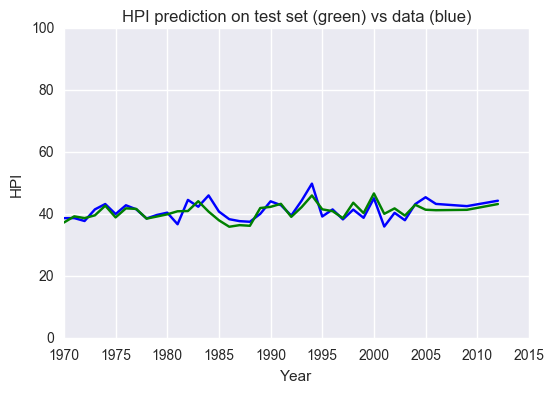

In [42]:
data_to_plot = test_data[['year','country']]
data_to_plot.loc[:,'prediction'] = pd.Series(test_predictions)
data_to_plot.loc[:,'class'] = pd.Series(test_class)
data_to_plot.is_copy = False

data_to_plot1 = data_to_plot.groupby('year').mean()
data_to_plot1.reset_index(inplace=True)

lines = plt.plot(data_to_plot1.loc[:,'year'].tolist(),data_to_plot1.loc[:,'class'].tolist(), color='b')
lines = plt.plot(data_to_plot1.loc[:,'year'].tolist(),data_to_plot1.loc[:,'prediction'].tolist(), color='g')

plt.ylabel('HPI')
plt.xlabel('Year')
plt.title('HPI prediction on test set (green) vs data (blue)')
plt.ylim(0,100)
plt.show()

C:\Users\Avi\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Avi\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


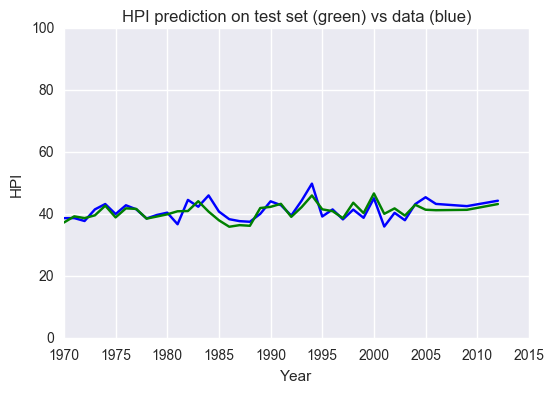

In [39]:
data_to_plot = test_data[['year','country']]
data_to_plot['prediction'] = pd.DataFrame(test_predictions)
data_to_plot['class'] = pd.DataFrame(test_class)
data_to_plot.is_copy = False

data_to_plot1 = data_to_plot.groupby('year').mean()
data_to_plot1.reset_index(inplace=True)
DataVisualizations.simple2Dgraph(data_to_plot1['year'], 'HPI prediction on test set (green) vs data (blue)'\
              , 'Year', 'HPI', 0, 100, [data_to_plot1['class'], data_to_plot1['prediction']], ['b','g'])

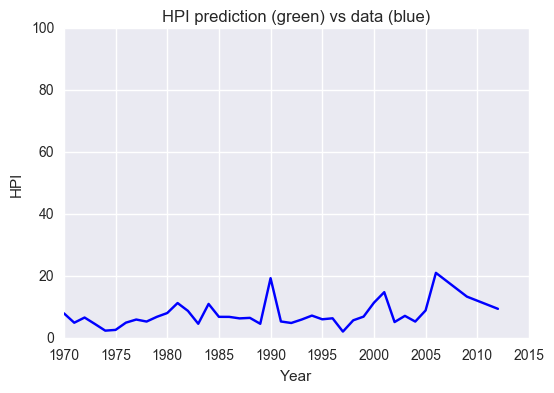

The average percantage error: 9.87439481738797 %


In [43]:
def errPercentage(value, predites):
    return (abs(value-predites)/value)*100

data_to_plot['errPercentage'] = data_to_plot.apply(lambda row: errPercentage(row['class'], row['prediction']), axis=1)

data_to_plot2 = data_to_plot.groupby('year').mean()
data_to_plot2.reset_index(inplace=True)

lines = plt.plot(data_to_plot2['year'].tolist(),data_to_plot2['errPercentage'].tolist(), color='b')

plt.ylabel('HPI')
plt.xlabel('Year')
plt.title('HPI prediction (green) vs data (blue)')
plt.ylim(0,100)
plt.show()

print('The average percantage error:', data_to_plot['errPercentage'].mean(), '%')

## HPI of test by countries

In [28]:
MapVisualizations.plotDataOnMap(data_to_plot, feature='class', year='mean')

## Predicted HPI of test by countries

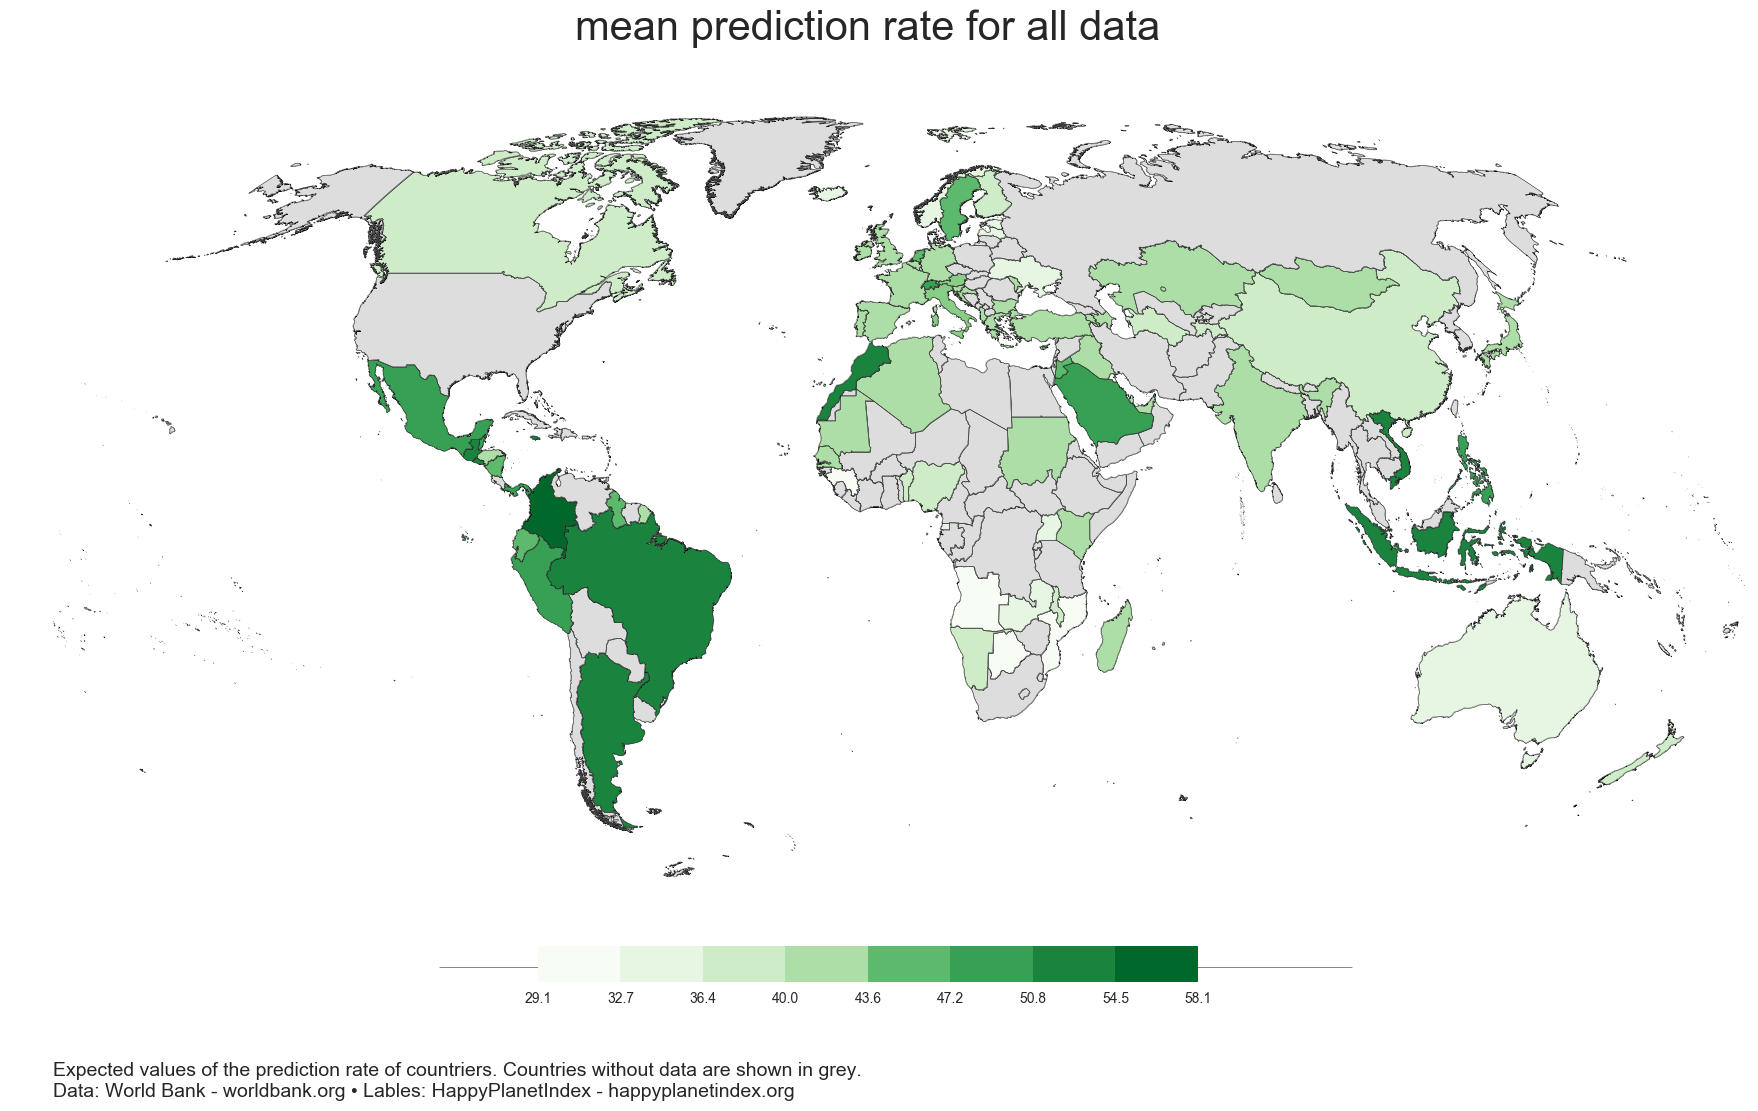

In [163]:
MapVisualizations.plotDataOnMap(data_to_plot, feature='prediction', year='mean')

## Countries that the rediction missed

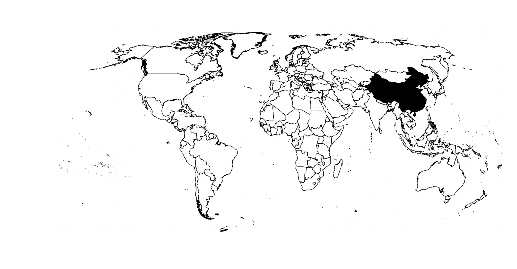

In [164]:
predicted_image = globe_plots + 'prediction_mean.png'
actual_image = globe_plots + 'class_mean.png'
output_image = uncorrolated_plots + 'prediction-class.png'
MapVisualizations.plotUncorrolatedCountries(predicted_image, actual_image, output_image)